<a href="https://colab.research.google.com/github/OtolaHan/Otola_Han_KAAN/blob/main/L_3_data_mining_5_ru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [54]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

In [55]:
import nltk



def format_rows(docs):
    """ format the text field and strip special characters """
    D = []
    for d in docs.data:
        temp_d = " ".join(d.split("\n")).strip('\n\t')
        D.append([temp_d])
    return D

def format_labels(target, docs):
    """ format the labels """
    return docs.target_names[target]

def check_missing_values(row):
    """ functions that check and verifies if there are missing values in dataframe """
    counter = 0
    for element in row:
        if element == True:
            counter+=1
    return ("The amoung of missing records is: ", counter)

def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens

In [56]:
import pandas as pd

# construct dataframe from a list
X = pd.DataFrame.from_records(format_rows(twenty_train), columns= ['text'])

In [57]:
# add category to the dataframe
X['category'] = twenty_train.target

In [58]:
# add category label also
X['category_name'] = X.category.apply(lambda t: format_labels(t, twenty_train))

## 5. Предварительная обработка данных
На курсе Data Mining мы узнали о множестве способов выполнения предварительной обработки данных. В действительности, этот список довольно общий, поскольку особенности предварительной обработки данных слишком велики, чтобы их можно было охватить в одном курсе. Это особенно актуально, когда вы имеете дело с неструктурированными данными, как мы это делаем в этой конкретной записной книжке. Но давайте рассмотрим несколько примеров для каждого метода предварительной обработки данных, который мы изучили в классе. Мы рассмотрим каждый пункт по отдельности и предоставим пример кода для каждой категории. Вы узнаете, как выполнять каждую из операций с помощью Pandas, которые охватывают основы предварительной обработки в Data Mining. Мы не собираемся следовать какому-либо строгому порядку, но элементы, которые мы рассмотрим в разделе предварительной обработки этой записной книжки, следующие:

- Агрегирование
- Выборка
- Уменьшение размерности
- Выбор подмножества признаков
- Создание признаков
- Дискретизация и бинаризация
- Преобразование атрибутов

---

### 5.1 Выборка
Первой концепцией из вышеуказанного списка, которую мы собираемся рассмотреть, является выборка. Выборка относится к методу, используемому для выбора данных. Функциональные возможности, которые мы используем для выбора данных с помощью запросов, предоставляемых Pandas, на самом деле являются основными методами выборки. Причины для выборки иногда связаны с размером данных - мы хотим получить меньшее подмножество данных, которое по-прежнему достаточно репрезентативно по сравнению с исходным набором данных.

У нас нет проблем с размером в нашем текущем наборе данных, поскольку он содержит всего несколько тысяч записей. Но если мы обратим внимание на то, сколько контента включено в поле `text` каждой из этих записей, вы поймете, что выборка все же может быть неплохой идеей. Фактически, мы уже провели некоторую выборку, просто уменьшив количество записей, которые мы используем здесь, в этой записной книжке; помните, что мы используем только четыре категории из всех 20 доступных категорий. Давайте получим представление о том, как выполнять выборку с помощью операций pandas.

In [ ]:
X_sample = X.sample(n=1000) #random state

In [ ]:
len(X_sample)

1000

In [ ]:
X_sample[0:4]

,text,category,category_name
407,From: ednclark@kraken.itc.gu.edu.au (Jeffrey C...,0,alt.atheism
1254,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
1391,From: black@sybase.com (Chris Black) Subject: ...,2,sci.med
1505,From: kimd@rs6401.ecs.rpi.edu (Daniel Chungwan...,1,comp.graphics


---

### >>> Упражнение 6 (на дом):
Заметили какие-либо изменения в фрейме данных `X`? Какие они? Сообщите о каждом замеченном вами изменении по сравнению с предыдущим состоянием `X`. Не стесняйтесь запрашивать и более внимательно изучать фрейм данных на предмет этих изменений.

In [ ]:
# Ответьте здесь
# Основное изменение заключается в том, что X_sample теперь является меньшей, случайной выборкой из исходного фрейма данных X. Это полезно для:
# 1) Ускорения обработки: Работа с 1000 строками быстрее, чем с полным набором данных, особенно для предварительного анализа, экспериментов или обучения моделей на меньшем масштабе.
# 2) Разработки и тестирования: Можно быстрее разрабатывать и тестировать код обработки данных или модели машинного обучения на меньшем образце данных, прежде чем применять их к полному набору данных.

---

Давайте сделаем что-нибудь крутое здесь, пока мы работаем с выборкой! Давайте посмотрим на распределение категорий как в выборке, так и в исходном наборе данных. Давайте визуализируем и проанализируем различие между двумя наборами данных. Чтобы сгенерировать некоторые визуализации, мы собираемся использовать библиотеку python `matplotlib`. С matplotlib все происходит быстрее, а с точки зрения совместимости это может быть лучшая библиотека визуализации для визуализации контента, извлеченного из фреймов данных, и при использовании записных книжек Jupyter. Давайте взглянем на волшебство `matplotlib` ниже.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

category_name
soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

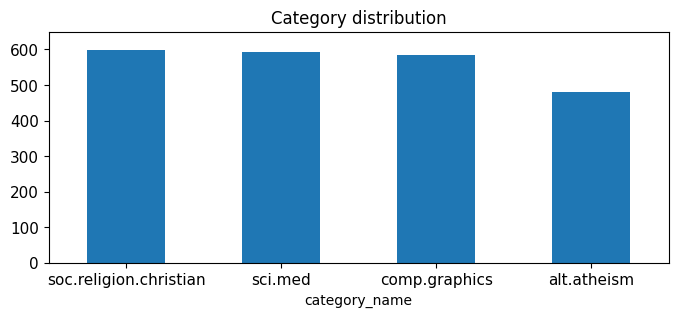

In [59]:
print(X.category_name.value_counts())

# plot barchart for X_sample
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 650],
                                    rot = 0, fontsize = 11, figsize = (8,3))

category_name
soc.religion.christian    266
sci.med                   265
comp.graphics             257
alt.atheism               212
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

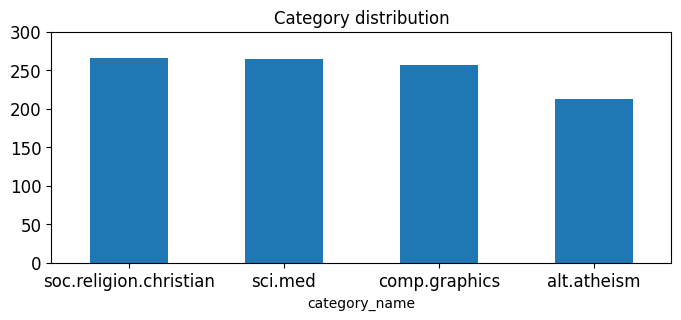

In [ ]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300],
                                           rot = 0, fontsize = 12, figsize = (8,3))

Вы можете использовать следующую команду, чтобы увидеть другие доступные стили для украшения ваших диаграмм.
```python
print(plt.style.available)```

---

### >>> **Упражнение 7 (5 мин):**
Обратите внимание, что для параметров `ylim` мы жестко закодировали максимальное значение для y. Можно ли автоматизировать это вместо жесткого кодирования? Как бы вы это сделали? (Подсказка: посмотрите код выше, чтобы найти подсказки)

category_name
soc.religion.christian    266
sci.med                   265
comp.graphics             257
alt.atheism               212
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

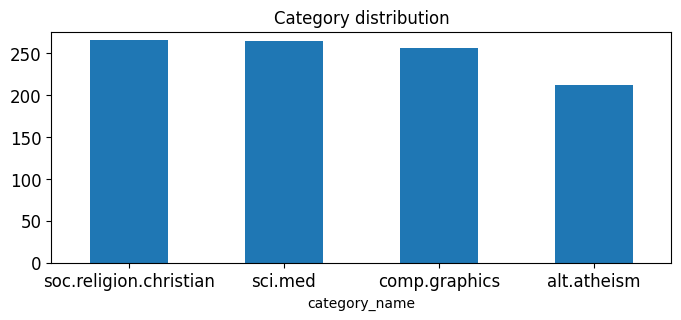

In [ ]:
# Ответьте здесь
upper_bound = max(X_sample.category_name.value_counts()) + 10

print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound],
                                           rot = 0, fontsize = 12, figsize = (8,3))

---

### >>> **Упражнение 8 (на дом):**
Мы также можем выполнить сравнение распределения между двумя наборами данных рядом, но, возможно, вы можете попробовать это в качестве упражнения. Ниже мы покажем вам снимок типа диаграммы, который мы ищем.

![alt txt](https://i.imgur.com/9eO431H.png)

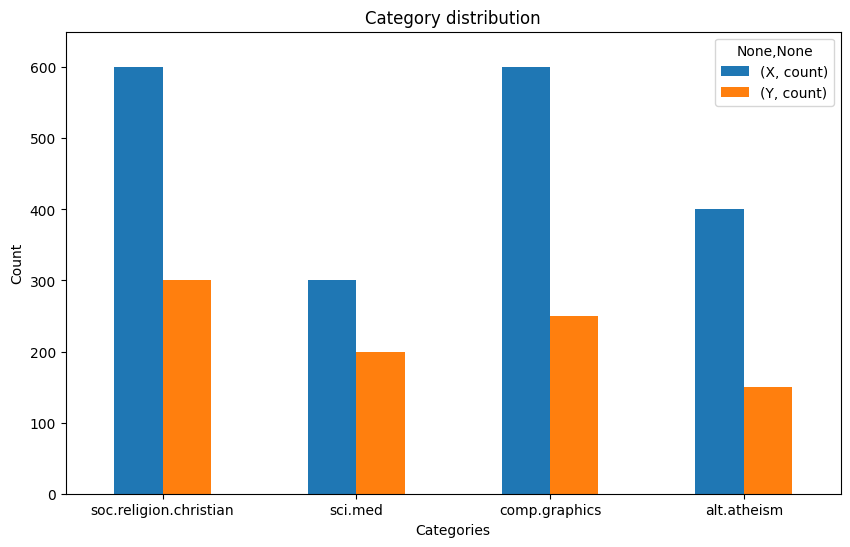

In [ ]:
# Ответьте здесь
data_x = {'category_name': ['soc.religion.christian', 'sci.med', 'comp.graphics', 'alt.atheism'],
          'count': [600, 300, 600, 400]}
data_y = {'category_name': ['soc.religion.christian', 'sci.med', 'comp.graphics', 'alt.atheism'],
          'count': [300, 200, 250, 150]}

# Создание DataFrame
X = pd.DataFrame(data_x)
Y = pd.DataFrame(data_y)

# Установка названий категорий в качестве индекса для простого объединения
X.set_index('category_name', inplace=True)
Y.set_index('category_name', inplace=True)

# Объединение данных
combined_df = pd.concat([X, Y], axis=1, keys=['X', 'Y'])

# Построение графика
ax = combined_df.plot(kind='bar',
                      figsize=(10, 6),
                      title='Category distribution',
                      ylim=[0, 650],
                      rot=0)

# Настройка меток
ax.set_xlabel('Categories')
ax.set_ylabel('Count')

plt.show()

Одной из особенностей обоих наборов данных является то, что распределение категорий остается относительно одинаковым, что является хорошим знаком для нас, специалистов по анализу данных. Существует множество способов выполнить выборку в наборе данных и при этом получить достаточно представительный набор данных. Это не является основной темой этой записной книжки, но если вы хотите узнать больше о выборке и о том, как работает функция `sample`, просто обратитесь к документации Pandas, и вы найдете интересные способы проведения более продвинутой выборки.

---

### 5.2 Создание признаков
Другой операцией из списка выше, которую мы собираемся отработать, является так называемое создание признаков. Как следует из названия, при создании признаков мы рассматриваем создание новых интересных и полезных признаков из исходного набора данных; признак, который отражает наиболее важную информацию из необработанной информации, к которой у нас уже есть доступ. В нашей таблице `X` мы хотели бы создать некоторые признаки из поля `text`, но мы все еще не уверены, какие признаки мы хотим создать. Мы можем подумать об интересной проблеме, которую мы хотим решить, или о чем-то, что мы хотим проанализировать из данных, или о некоторых вопросах, на которые мы хотим ответить. Это один из процессов разработки признаков - этот процесс обычно называется `конструированием признаков` в сообществе специалистов по данным.

Мы знаем, что такое создание признаков, поэтому давайте реально вовлечемся в наш набор данных и сделаем его более интересным, добавив некоторые специальные признаки или атрибуты, если хотите. Во-первых, мы собираемся получить **униграммы** для каждого текста. (Униграмма - это всего лишь причудливое слово, которое мы используем в Text Mining, которое означает «токены» или «отдельные слова».) Да, мы хотим извлечь все слова, найденные в каждом тексте, и добавить их в качестве нового признака во фрейм данных pandas. Причина извлечения униграмм пока не совсем ясна, но мы можем начать думать о получении некоторой статистики о статьях, которые у нас есть: что-то вроде **распределения слов** или **частоты слов**.

Прежде чем переходить к дальнейшему кодированию, мы также представим полезную библиотеку интеллектуального анализа текста под названием [NLTK](http://www.nltk.org/). Библиотека NLTK - это инструмент обработки естественного языка, используемый для задач интеллектуального анализа текста, поэтому с этого момента мы вполне можем начать знакомиться с ним (это может пригодиться для финального проекта!). В частности, мы собираемся использовать библиотеку NLTK для проведения токенизации, потому что мы заинтересованы в разделении предложения на отдельные компоненты, которые мы называем словами, смайликами, электронными письмами и т. д. Итак, давайте сделаем это! Мы можем вызвать библиотеку `nltk` следующим образом:

```python
import nltk
```

In [ ]:
import nltk

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# для обработки требуется минута или две
X['unigrams'] = X['text'].apply(lambda x: tokenize_text(x))

In [ ]:
X[0:4]["unigrams"]

,unigrams
0,"[From, :, sd345, @, city.ac.uk, (, Michael, Co..."
1,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B...."
2,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ..."
3,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ..."


Если вы внимательнее посмотрите на таблицу `X` сейчас, вы увидите новые столбцы `unigrams`, которые мы добавили. Вы заметите, что он содержит массив токенов, которые были извлечены из исходного поля `text`. На первый взгляд вы заметите, что токенизатор работает не очень хорошо, давайте внимательнее посмотрим на одну запись и посмотрим, каким был точный результат токенизации с использованием библиотеки `nltk`.

In [ ]:
X[0:4]

,text,category,category_name,unigrams
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co..."
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B...."
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ..."
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ..."


In [ ]:
list(X[0:1]['unigrams'])

[['From',
  ':',
  'sd345',
  '@',
  'city.ac.uk',
  '(',
  'Michael',
  'Collier',
  ')',
  'Subject',
  ':',
  'Converting',
  'images',
  'to',
  'HP',
  'LaserJet',
  'III',
  '?',
  'Nntp-Posting-Host',
  ':',
  'hampton',
  'Organization',
  ':',
  'The',
  'City',
  'University',
  'Lines',
  ':',
  '14',
  'Does',
  'anyone',
  'know',
  'of',
  'a',
  'good',
  'way',
  '(',
  'standard',
  'PC',
  'application/PD',
  'utility',
  ')',
  'to',
  'convert',
  'tif/img/tga',
  'files',
  'into',
  'LaserJet',
  'III',
  'format',
  '.',
  'We',
  'would',
  'also',
  'like',
  'to',
  'do',
  'the',
  'same',
  ',',
  'converting',
  'to',
  'HPGL',
  '(',
  'HP',
  'plotter',
  ')',
  'files',
  '.',
  'Please',
  'email',
  'any',
  'response',
  '.',
  'Is',
  'this',
  'the',
  'correct',
  'group',
  '?',
  'Thanks',
  'in',
  'advance',
  '.',
  'Michael',
  '.',
  '--',
  'Michael',
  'Collier',
  '(',
  'Programmer',
  ')',
  'The',
  'Computer',
  'Unit',
  ',',
  'Emai

Библиотека `nltk` довольно неплохо справляется с токенизацией нашего текста. Существует много других токенизаторов в Интернете, таких как [spaCy](https://spacy.io/) и встроенные библиотеки, предоставляемые [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Мы используем библиотеку NLTK, потому что она имеет открытый исходный код и потому что она хорошо сегментирует данные на основе текста.

---

### 5.3 Выбор подмножества признаков
Хорошо, так что мы добиваемся некоторых успехов здесь. Теперь давайте сделаем вещи немного более интересными. Мы собираемся сделать что-то отличное от того, что мы делали до сих пор. Мы собираемся использовать немного всего, что мы узнали до сих пор. Говоря кратко, мы собираемся отойти от нашего основного набора данных (одна из форм выбора подмножества признаков), и мы собираемся сгенерировать матрицу документ-термин из исходного набора данных. Другими словами, мы собираемся создать что-то вроде этого.

![alt txt](https://docs.google.com/drawings/d/e/2PACX-1vS01RrtPHS3r1Lf8UjX4POgDol-lVF4JAbjXM3SAOU-dOe-MqUdaEMWwJEPk9TtiUvcoSqTeE--lNep/pub?w=748&h=366)

Первоначально он не будет иметь ту же форму, что и таблица выше, но мы перейдем к этому позже. А пока давайте используем встроенные функциональные возможности scikit learn для создания этого документа. Вы сами увидите, как легко сгенерировать эту таблицу без особого кодирования.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [ ]:
X_counts

<2257x35788 sparse matrix of type '<class 'numpy.int64'>'
	with 365886 stored elements in Compressed Sparse Row format>

То, что мы сделали с этими двумя строками кода, это то, что мы преобразовали статьи в **матрицу термин-документ**. Эти строки кода токенизируют каждую статью с помощью встроенного токенизатора по умолчанию (часто называемого `анализатором`), а затем создает вектор частоты слов для каждого документа. Мы можем создавать свои собственные анализаторы или даже использовать анализатор nltk, который мы создали ранее. Чтобы все было аккуратно и минимально, мы собираемся использовать анализатор по умолчанию, предоставляемый `CountVectorizer`. Давайте внимательно посмотрим на этот анализатор.

In [ ]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")
#" ".join(list(X[4:5].text))

['hello', 'world']

---